<a href="https://colab.research.google.com/github/javierbmm/handwritting_classification/blob/main/handwritting_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritting Classification

Classification of handwritting numbers (from 0 to 9) using KNN neighbours algorithm, implementing preprocessing, scaling and tuning data techniques for dimensionality reduction:
* **PCA**: Principal component analysis.
* **TruncatedSVD**: Truncated singular value decomposition (aka LSA)

More details on implementation and algorithm explanations throughout this notebook. 

________________________________________________
_Javier Merida_


_Barcelona, December 2021._

## Loading main libraries

In [386]:
# -libraries
import numpy
import sklearn
import sklearn.datasets
import sklearn.model_selection
import sklearn.decomposition

# - visualization
import matplotlib.pyplot as plt

## Auxiliar functions

In [387]:
# - Functions
def load_data():
	'''
	Load the handwritting digits data and divide it into X (data) and Y (target)
	'''

	_digits = sklearn.datasets.load_digits()
	_X = _digits.data
	_Y = _digits.target
	return _digits, _X, _Y


def describe_data(images=False):
	'''
	Prints the digits description along with X and Y shapes, feature and target 
	names. If images=True, it will also display the first 10 images. 
	'''
	print(digits.DESCR)
	print('X shape:', X.shape)
	print('Y shape:', Y.shape)
	print('Feature names:', digits.feature_names)
	print('Target names:', digits.target_names)
	if images:
		plt.gray()
		for i in range(10):
			plt.matshow(digits.images[i])
			plt.show()


def preprocess_data():
	'''
	Preprocessing data using normalization to obtain a zero mean and unit variance,
	and applies scaling on testing data having into account x_train statistics,
	using a Logistic Regression om it. 
	'''
	# - Data normalization 
	from sklearn import preprocessing
	_scaler = preprocessing.StandardScaler()
	_scaler.fit(x_train)
  # Scale train data
	_x_train_scaled = _scaler.transform(x_train)
	# Scaling on testing data having into account x_train statistics
	_x_test_scaled = _scaler.transform(x_test)

	return _x_train_scaled, _x_test_scaled

## Loading data
As we can see, the dataset is made of 1797 instances (images) with 64 attributes. Each image is made of 8x8 pixels and represents a handwritten number from 0 to 9 in black and white, which we will try to classify according to its data. 

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

<Figure size 432x288 with 0 Axes>

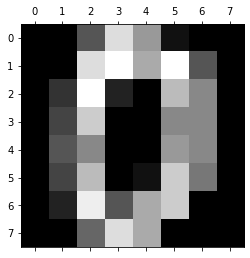

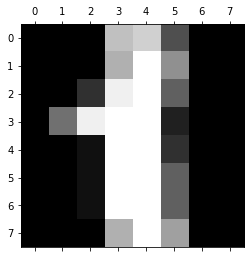

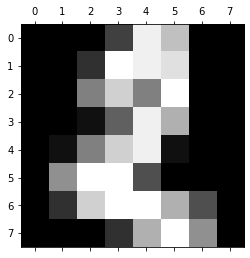

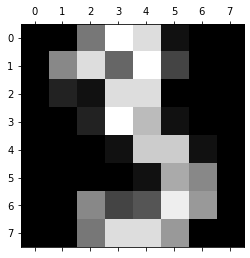

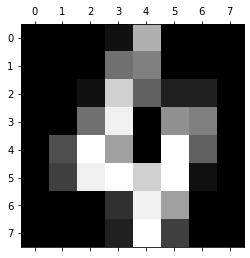

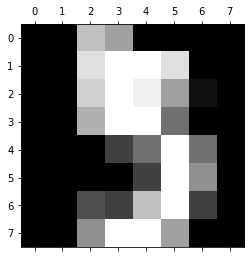

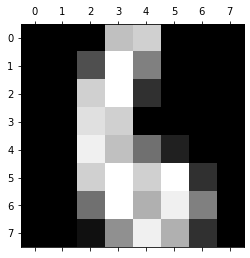

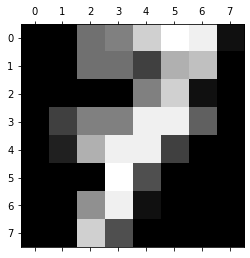

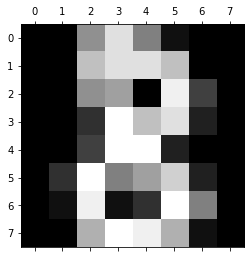

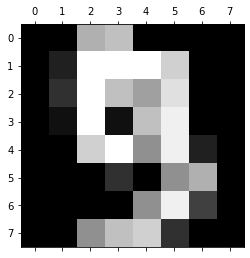

In [388]:
# - loading data
digits, X, Y = load_data()
describe_data(images=True)

## Splitting data

Splitting data is a pre-step which purpose is to evaluate the performance of a 
machine learning algorithm, and it's done prior to processing this data. 

The procedure involves taking the dataset and splitting it into two subsets: Train data, which is used to fit and train the algorithm or machine learning technique, and Test data, which is used to compare the predictions made to these expected values. 

Thus, in this case we will use the following dimensions for both subsets:
* 75% Train data (1347 samples).
* 25% Test data (450 samples).

In [389]:
# - split the data 75% train and 25% test subsets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1347, 64) (450, 64) (1347,) (450,)


## Preprocessing data

### Data normalization
Also known as **Feature Scaling**, it's preprocessing technique that is not always required in machine learning algorithms, but it may be helpful as it allows us to change the numerical values of our data into a common scale (ie. from 0 to 1), without changing the differences in ranges values nor the type of distribution. 

**Normalization** is specially important in KNN neighbours since the algorithm uses distance measure, and features with larger values will be dominant, thus the final result correctness will be distorted. 

In [390]:
# - preprocessing data
x_train_scaled, x_test_scaled = preprocess_data()
print("Train data:", x_train_scaled, "\nTest data:", x_test_scaled)

Train data: [[ 0.         -0.34658389 -0.67111503 ... -1.15783495 -0.50770266
  -0.19895848]
 [ 0.          5.19793507  2.23828434 ... -0.13881915 -0.26774635
  -0.19895848]
 [ 0.         -0.34658389 -0.25548655 ... -0.81816302 -0.50770266
  -0.19895848]
 ...
 [ 0.         -0.34658389  0.78358465 ...  1.55954051 -0.02779004
  -0.19895848]
 [ 0.         -0.34658389 -0.87892927 ... -1.15783495 -0.50770266
  -0.19895848]
 [ 0.         -0.34658389 -0.87892927 ... -0.98799898 -0.50770266
  -0.19895848]] 
Test data: [[ 0.         -0.34658389 -1.08674351 ...  1.21986858  0.69207889
  -0.19895848]
 [ 0.         -0.34658389  1.19921313 ... -0.98799898 -0.50770266
  -0.19895848]
 [ 0.         -0.34658389  0.57577041 ...  0.20085278 -0.50770266
  -0.19895848]
 ...
 [ 0.          0.7623199   1.61484161 ...  0.88019664  0.69207889
  -0.19895848]
 [ 0.         -0.34658389 -1.08674351 ... -0.30865512 -0.50770266
  -0.19895848]
 [ 0.          6.30683886  2.23828434 ... -1.15783495 -0.50770266
  -0.198

## Dimensionality Reduction: [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) analysis  





In [391]:
from sklearn.decomposition import PCA

# - PCA Analysis
pca = PCA() 
pca.fit(x_train_scaled)

PCA()

### PCA explains a part of the variance.

In [392]:
# - the PCA explains a part of the variance.
print(pca.components_)
print(pca.explained_variance_)


[[ 2.45769908e-18 -1.93435053e-01 -2.84584362e-01 ... -1.01977598e-01
  -1.28763282e-01 -7.46025470e-02]
 [-3.86280647e-20  4.58912013e-02  6.48072981e-02 ... -2.24909035e-01
  -1.52595100e-01 -6.59506368e-02]
 [ 2.92546202e-19 -3.32616468e-03  7.63072966e-02 ...  2.51047630e-02
  -8.80176474e-02 -8.08010464e-02]
 ...
 [ 0.00000000e+00 -2.89672775e-16 -6.05869374e-17 ...  3.58220398e-16
   2.77555756e-16 -1.11022302e-16]
 [ 0.00000000e+00 -3.56579139e-17 -2.46493011e-17 ... -2.74519990e-16
   1.30971622e-16 -7.45931095e-17]
 [ 1.00000000e+00  1.87747998e-18  1.53904343e-17 ... -8.02909398e-18
  -6.57781674e-18  4.70297171e-19]]
[7.39473869e+00 5.92231880e+00 5.25229279e+00 3.90746836e+00
 2.97614572e+00 2.64108436e+00 2.41403293e+00 2.07472957e+00
 1.85134308e+00 1.79411347e+00 1.69189093e+00 1.55116122e+00
 1.38886839e+00 1.37402220e+00 1.29237813e+00 1.16323953e+00
 1.07166994e+00 9.85840361e-01 9.70818420e-01 9.23958520e-01
 8.18786025e-01 7.78110384e-01 6.73067143e-01 6.35974128e-0

###  Plotting the cumulative variance to get the number of principal components we need.

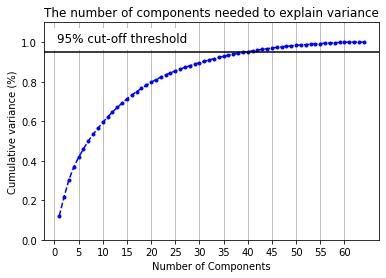

In [393]:
xi = numpy.arange(1, 65, step=1)
y = numpy.cumsum(pca.explained_variance_ratio_)

fig, ax = plt.subplots()
plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker='.', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(numpy.arange(0, 64, step=5))  # change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='black', linestyle='-')
plt.text(0.5, 1.00, '95% cut-off threshold', color='black', fontsize=12,
         backgroundcolor='white')

ax.grid(axis='x')
plt.show()
# We can see how the cut-off threshold crosses with the cumulative variance at 40 number of components.
# Hence, this is the number of principals we need.

## Dimensionality Reduction: [SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) analysis 




In [394]:
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD(63)
projected_svd = tsvd.fit(x_train_scaled)

### Same analysis as PCA: obtaining the best number of components for SVD.

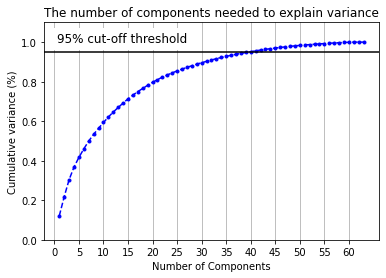

In [395]:
xi = numpy.arange(1, 64, step=1)
y = numpy.cumsum(tsvd.explained_variance_ratio_)

fig, ax = plt.subplots()

plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker='.', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(numpy.arange(0, 64, step=5))  # change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='black', linestyle='-')
plt.text(0.5, 1.00, '95% cut-off threshold', color='black', fontsize=12,
         backgroundcolor='white')

ax.grid(axis='x')
plt.show()
# From the cut-off threshold, we can see the number of components it's equal to 
# as previous PCA results, 40 components. 

## Applying a dimension reduction choosing a 95% of variance explained

In [396]:
pca = PCA(40).fit(x_train_scaled)
pca_train = pca.transform(x_train_scaled)
pca_test  = pca.transform(x_test_scaled)
# print("PCA\n\ntrain data:", pca_train, "\n\ntest data:", pca_test)

In [397]:
tsvd = TruncatedSVD(40).fit(x_train_scaled)
tsvd_train = tsvd.transform(x_train_scaled)
tsvd_test = tsvd.transform(x_test_scaled)
# print("Truncated SVD\n\ntrain data:", tsvd_train, "\n\ntest data:", tsvd_test)

### PCA vs Truncated SVD

While both methods attempt to perform a *Dimensionality Reduction*, **PCA** is a projection such that the variance is as high as possible, this is, using *eigenvalues* and *eigenvectors* in *covariance matrix* to calculate and rank the importance of features, whereas **SVD** works very similar to PCA but instead of using a covariance matrix, it works directly on the sample matrices. 
Hence, both methods produce an equivalent result matrix.  

Moreover, we obtained the same value of dimension reduction using a threshold of 95% variance explained (40, over 64) with both methods, which is not a surprise since they are equivalent, as explained previously. 



### Using PCA results 

Finally, for the sake of continuing with our kNN analysis, we will use the projected PCA matrixes. Nonetheless, SVD results could have been used indistinctly.

In [398]:
x_train_scaled = pca_train
x_test_scaled = pca_test

## Find the k optimal value for the k-NN classifier using 10-fold cross-validation

Now, we can proceed with the KNN classification algorithm, for which we first need to select a number of k neighbours to calculate. The selection of this number is not trivial, as the performance will depend directly on it. 

Therefore, we will apply a 10-fold cross validation to select an appropriate value for k. 

### 10-fold cross validation
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

For this, we will use a GridSearchCV(), in which we just need to pass different number of neighbours and it will fit the KNN algorithm with all of them, make a comparison on the score based on the comparison between the predicted data against the target data (from our train subset).  Finally, we can select the k number with the best score.


### Creating the model

In [399]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

### Creating a dictionary with all the values we want to try
In this case, we will do a 10-fold cross validation.

In [400]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': numpy.arange(1, 10)}

### Using gridsearch to test all values for `n_neighbors`

In [401]:
knn_gscv = GridSearchCV(knn, param_grid, cv=10)


### Fit model to data

In [402]:
knn_gscv.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

### Check best performing `n_neighbors` value (cross-validating)


In [403]:
print('best params:', knn_gscv.best_params_)

best params: {'n_neighbors': 3}


### Best score output

In [404]:
print('best score:', knn_gscv.best_score_)

best score: 0.9762465450525152


Like this, we’ve determined that the most appropriate number of neighbours for our KNN Algorithm is 3. Bear in mind that this doesn’t necessarily mean it will give us the best score against the test data, since we are doing the comparison between 10 subsets from our train data. More on this in the following sections.

## Training/fitting KNN Classifier 

Finally, we perform the fitting process using the previously obtain number of neighbours equal to 3, and then we can test our model by predicting the numbers from the test data subset: 

In [405]:
n_neighbors = knn_gscv.best_params_["n_neighbors"]  # 3 neighbors
clf = KNeighborsClassifier(n_neighbors=n_neighbors)

### Learn the digits from the subset

In [406]:
clf.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

### Predict digit values from test subset

In [407]:
predicted = clf.predict(x_test_scaled)
print(predicted)

[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 3 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 9 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 8 9 6 9
 0 3 5 6 6 0 6 4 2 9 3 7 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 1 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 1 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 1 5 5 1 6 2 8 8 9 5 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 2
 4 5 8 7 9 8 6 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5 6 0 0 3 0 5 0 0 4 1
 2 8 4 5 9 6 3 1 8 8 4 2 3 8 9 8 8 5 0 6 3 3 7 1 6 4 1 2 1 1 6 4 7 4 8 3 4
 0 5 1 9 4 5 7 6 3 7 0 5 9 7 5 9 7 4 2 1 9 0 7 5 1 3 6 3 6 6 9 5 0 1 5 5 8
 3 2 6 2 6 5]


### Testing its correctness/score 

In [408]:
clf.score(x_test_scaled, y_test)

0.9666666666666667

## Metrics: Classification model report 

This report summarizes the following metrics:
- **Recall**: means "how many of this class you find over the whole number of element of this class"
- **Precision**: Scores on number of correctly classified value for each class.
- **F1-score**: Harmonic mean between precision and recall.
- **Support**: The number of occurence of each class in the dataset.

In [409]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.90      1.00      0.95        37
           2       0.93      0.97      0.95        38
           3       0.98      0.93      0.96        46
           4       1.00      1.00      1.00        55
           5       0.98      0.97      0.97        59
           6       0.96      1.00      0.98        45
           7       0.98      0.98      0.98        41
           8       0.97      0.92      0.95        38
           9       0.96      0.90      0.92        48

    accuracy                           0.97       450
   macro avg       0.96      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



## K Neighbours Analysis: different classifier performances varying the number of `k`

Now, we will test the performance of the algorithm by building different models with different numbers of k neighbours, from 1 to 25. 

### Varying the number of `k` from 1 to 25

In [410]:
scores_array = []
for i in range(25):
  k = i + 1
  aux_knn = KNeighborsClassifier(n_neighbors=k)
  aux_knn.fit(x_train_scaled, y_train)
  score = aux_knn.score(x_test_scaled, y_test)
  scores_array.append(score)

print(scores_array)

[0.9777777777777777, 0.9644444444444444, 0.9666666666666667, 0.9688888888888889, 0.98, 0.9688888888888889, 0.9777777777777777, 0.9711111111111111, 0.9755555555555555, 0.9733333333333334, 0.9755555555555555, 0.9711111111111111, 0.9644444444444444, 0.9577777777777777, 0.9511111111111111, 0.9577777777777777, 0.9488888888888889, 0.9488888888888889, 0.9466666666666667, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9466666666666667, 0.9444444444444444]


## Plotting the results

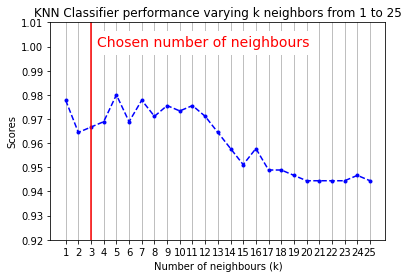

In [411]:
xi = numpy.arange(1, 26, step=1)
y = scores_array

fig, ax = plt.subplots()
plt.ylim(0.92, 1.01)
plt.plot(xi, y, marker='.', linestyle='--', color='b')

plt.xlabel('Number of neighbours (k)')
plt.xticks(numpy.arange(1, 26, step=1))  
plt.ylabel('Scores')
plt.title('KNN Classifier performance varying k neighbors from 1 to 25')

plt.axvline(x=3, color='r', linestyle='-')
plt.text(3.5, 1, 'Chosen number of neighbours', color='red', fontsize=14, 
         backgroundcolor='white')
ax.grid(axis='x')
plt.show()

Here we can see that there are some number of neighbours that outputs better results than the one we previously chose, but that doesn’t necessarily means it is better as it may enter into **overfitting**, which is a condition where a model or functions fits too close to the test data, and consequently, giving statistically wrong results against other data, hence it will end up being useful only for the initial data set. Thus, attempting to make the model conform too closely to slightly inaccurate data can infect the model with substantial errors and reduce its predictive power.

## References

https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/

https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://etav.github.io/python/scikit_pca.html

https://analyticsindiamag.com/beginners-guide-to-truncated-svd-for-dimensionality-reduction/

____________________

_Javier Merida_


_Barcelona. December, 2021_